# Air Quality Dataset( Time-series) Prediction.

multivariate time series forecasting – Vector Auto Regression (VAR)

https://archive.ics.uci.edu/ml/datasets/Air+Quality#

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded. 

Attribute Information:

0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in Â°C

13 Relative Humidity (%)

14 AH Absolute Humidity 

In [24]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=14,12
%matplotlib inline

In [25]:
df = pd.read_csv("/home/preeti/Desktop/AirQualityUCI.csv", sep =';',decimal=',')

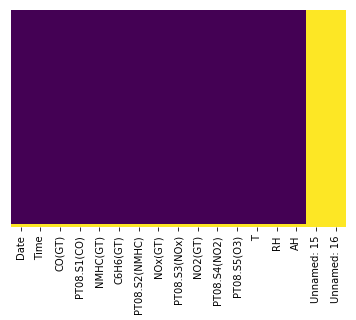

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We see last two columns are blankm so we will eliminate them.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [28]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [29]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [30]:
df.Date.isnull().values.any()

True

In [31]:
df.dropna(axis=0, how ='all',inplace=True)


In [32]:
df.dropna(axis=1,inplace=True)

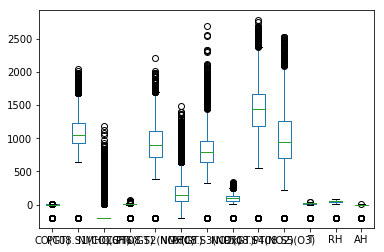

In [33]:
df.plot.box()

In [34]:
df.apply(lambda x : x == -200).sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

The dataset description states that the missing values have been filled as -200, so we need to fill it with some relevant number ! But as in NMHC(GT), 8443/9357 are -200, lets drop it.

In [35]:
df.drop(['NMHC(GT)'],axis=1, inplace= True)

In [36]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)

In [37]:
df['Date']=pd.to_datetime(df.Date, format='%d/%m/%Y') #format date column

In [38]:
#df.set_index('Date', inplace=True)


In [39]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,2004-03-10,23.00.00,1.2,1197.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,2004-03-11,00.00.00,1.2,1185.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,2004-03-11,01.00.00,1.0,1136.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,2004-03-11,02.00.00,0.9,1094.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,2004-03-11,03.00.00,0.6,1010.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


In [40]:
df['month'] = df['Date'].dt.month
#df.set_index('Date', inplace=True)#Create month column (Run once)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3


In [41]:
df['Time'] = pd.to_datetime(df['Time'],format= '%H.%M.%S').dt.hour
type(df['Time'][0])

numpy.int64

In [42]:
df['CO(GT)']=df['CO(GT)'].fillna(df.groupby(['month','Time'])['CO(GT)'].transform('mean'))
df['NOx(GT)']=df['NOx(GT)'].fillna(df.groupby(['month','Time'])['NOx(GT)'].transform('mean'))
df['NO2(GT)']=df['NO2(GT)'].fillna(df.groupby(['month','Time'])['NO2(GT)'].transform('mean'))
df['PT08.S1(CO)']=df['PT08.S1(CO)'].fillna(df.groupby(['month','Time'])['PT08.S1(CO)'].transform('mean'))
df['C6H6(GT)']=df['C6H6(GT)'].fillna(df.groupby(['month','Time'])['C6H6(GT)'].transform('mean'))
df['PT08.S2(NMHC)']=df['PT08.S2(NMHC)'].fillna(df.groupby(['month','Time'])['PT08.S2(NMHC)'].transform('mean'))
df['PT08.S3(NOx)']=df['PT08.S3(NOx)'].fillna(df.groupby(['month','Time'])['PT08.S3(NOx)'].transform('mean'))
df['PT08.S4(NO2)']=df['PT08.S4(NO2)'].fillna(df.groupby(['month','Time'])['PT08.S4(NO2)'].transform('mean'))
df['PT08.S5(O3)']=df['PT08.S5(O3)'].fillna(df.groupby(['month','Time'])['PT08.S5(O3)'].transform('mean'))
df['T']=df['T'].fillna(df.groupby(['month','Time'])['T'].transform('mean'))
df['RH']=df['RH'].fillna(df.groupby(['month','Time'])['RH'].transform('mean'))
df['AH']=df['AH'].fillna(df.groupby(['month','Time'])['AH'].transform('mean'))


In [43]:
df.isnull().sum()

Date               0
Time               0
CO(GT)            31
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)          274
PT08.S3(NOx)       0
NO2(GT)          274
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
month              0
dtype: int64

In [44]:
df['CO(GT)']=df['CO(GT)'].fillna(df.groupby(['Time'])['CO(GT)'].transform('mean'))
df['NOx(GT)']=df['NOx(GT)'].fillna(df.groupby(['Time'])['NOx(GT)'].transform('mean'))
df['NO2(GT)']=df['NO2(GT)'].fillna(df.groupby(['Time'])['NO2(GT)'].transform('mean'))
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
month            0
dtype: int64

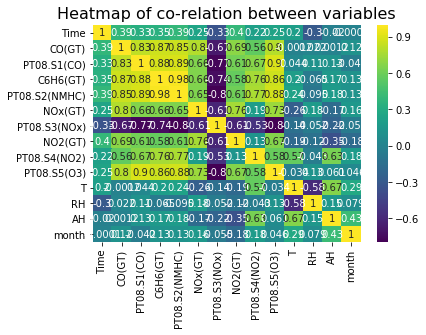

In [45]:
#Use heatmap to see corelation between variables
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

# Exploratory Data Analysis

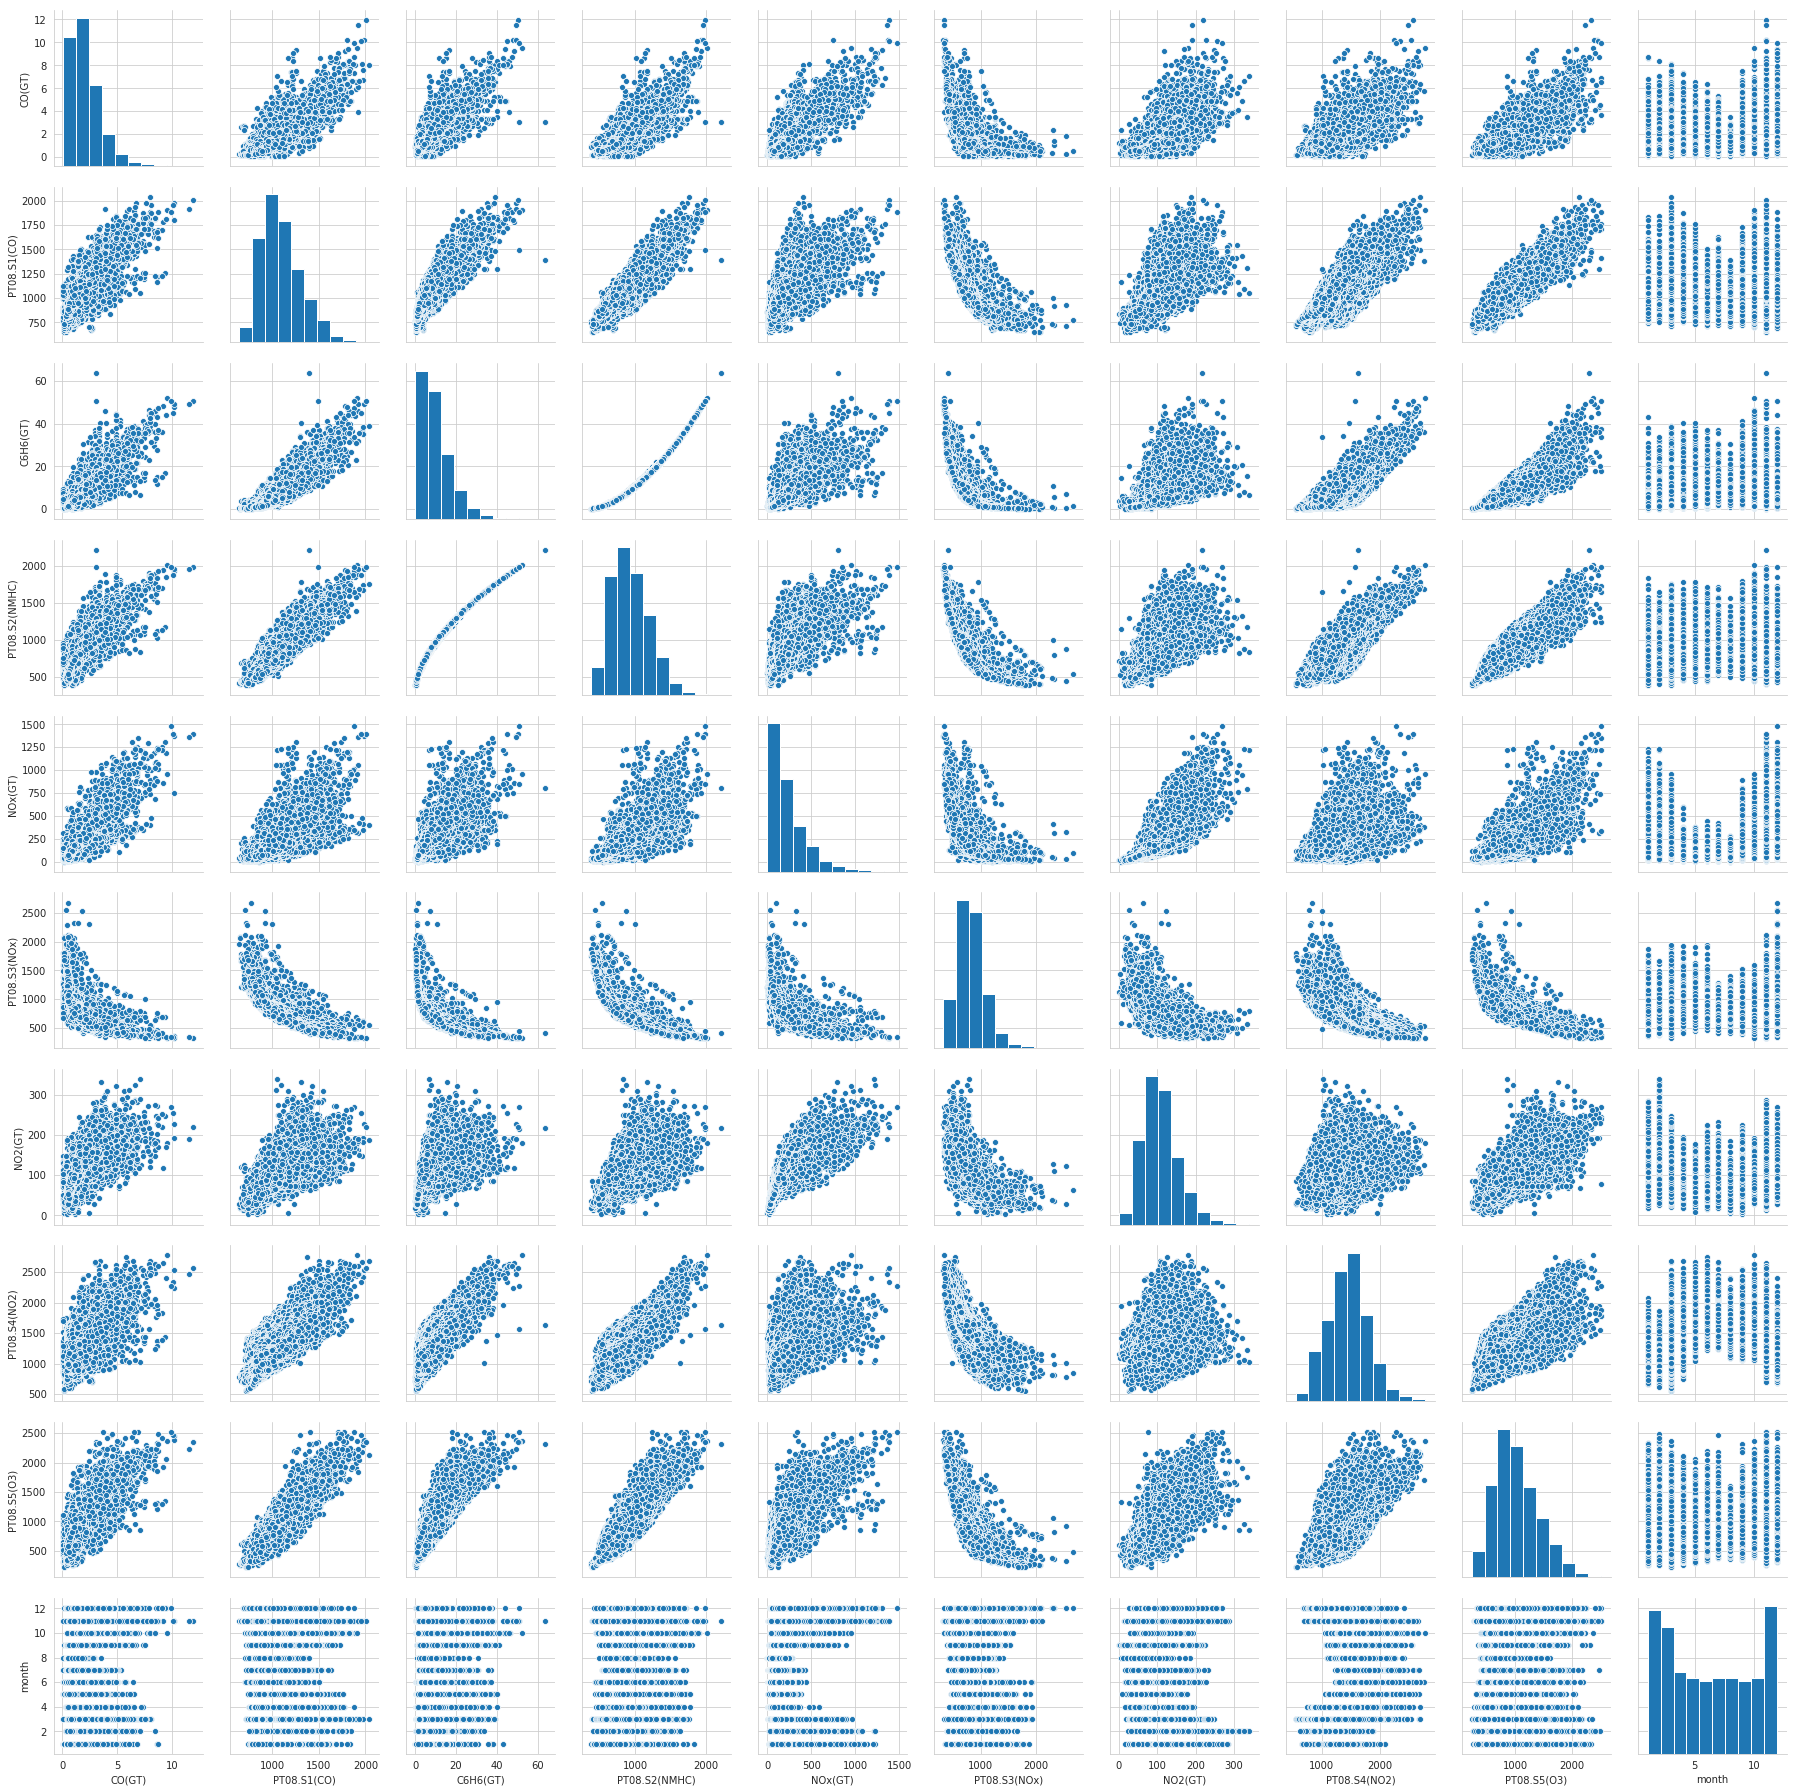

In [46]:
sns.set_style('whitegrid')
eda_data = df.drop(['Time','RH','AH','T'], axis=1)
sns.pairplot(eda_data)


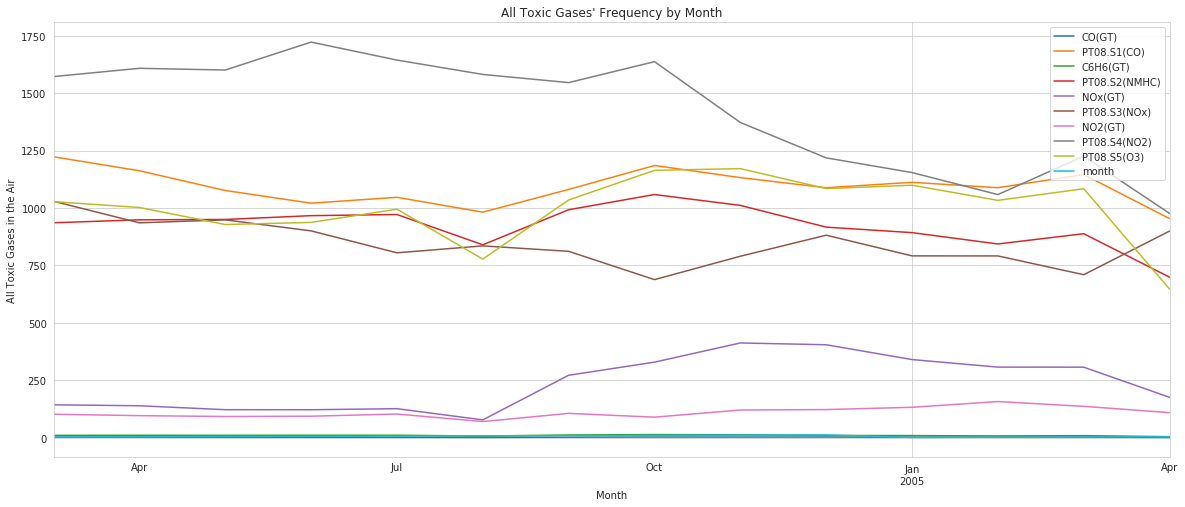

In [48]:
df.set_index('Date', inplace=True)
df.drop(['Time','RH','AH','T'], axis=1).resample('M').mean().plot(figsize = (20,8))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('All Toxic Gases in the Air')
plt.title("All Toxic Gases' Frequency by Month");


The above graph shows all the toxic gases present in air.The Brown line shows Nitrogen Oxides (NOx) and Yellow line shows NO2 which is part of NOx.Two of the most toxicologically significant compounds are nitric oxide (NO) and nitrogen dioxide (NO2).Nitrogen Oxides(NOx),one of the most dangerous forms of air pollution .

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Level by Month')

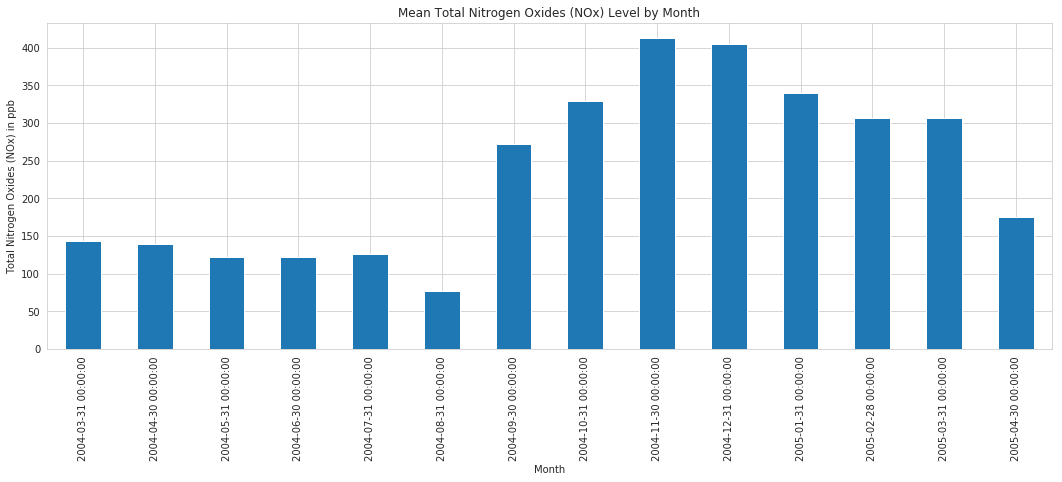

In [49]:
df['NOx(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Level by Month")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Frequency During Days')

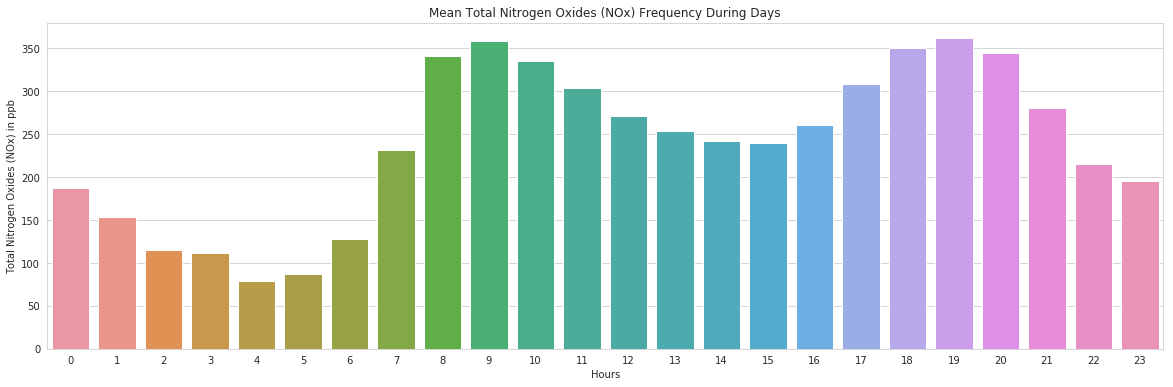

In [51]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NOx(GT)',data=df, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides  in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")


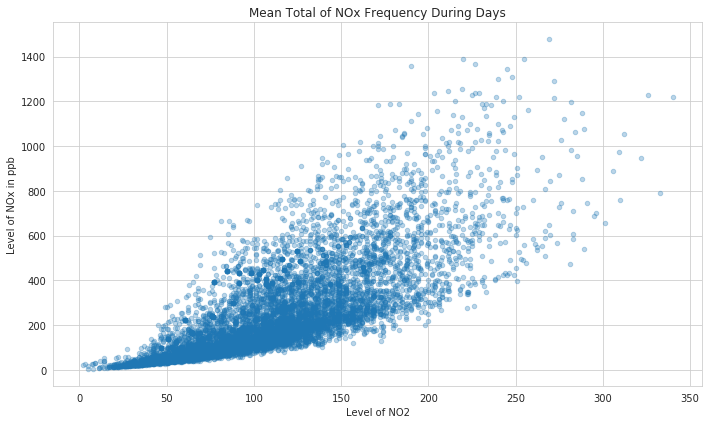

In [52]:
df.plot(x='NO2(GT)',y='NOx(GT)', kind='scatter', figsize = (10,6), alpha=0.3)
plt.xlabel('Level of NO2')
plt.ylabel('Level of NOx in ppb') # Parts per billion (ppb)
plt.title("Mean Total of NOx Frequency During Days")
plt.tight_layout();

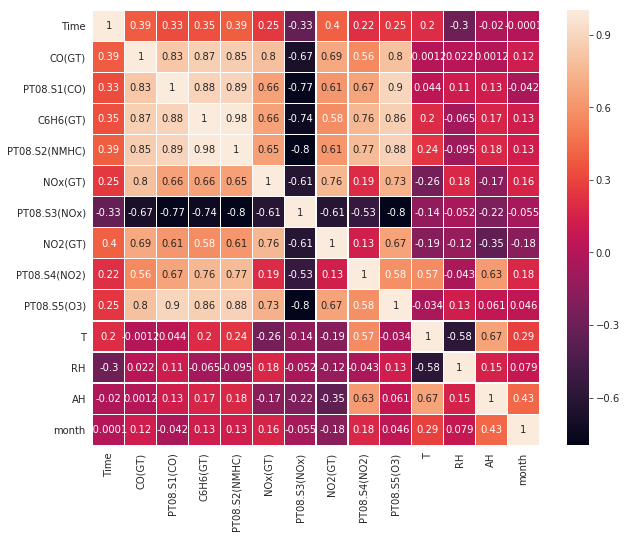

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=.20)

# Train, Test ,Model using Linear Regression

In [55]:
X = df.drop(['NOx(GT)','T','Time'], axis=1)
y= df['NOx(GT)']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
print(lm.intercept_)

5.356522811898088


In [60]:
coeff_data = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
CO(GT),61.091916
PT08.S1(CO),0.000391
C6H6(GT),11.911765
PT08.S2(NMHC),0.055789
PT08.S3(NOx),0.038488
NO2(GT),1.465944
PT08.S4(NO2),-0.388429
PT08.S5(O3),0.056172
RH,1.874586
AH,108.394627


# Prediction

In [61]:
prediction = lm.predict(X_test)

In [62]:
linear_regression_score = lm.score(X_test, y_test)
linear_regression_score

0.8613412944813285

# Residual Histogram

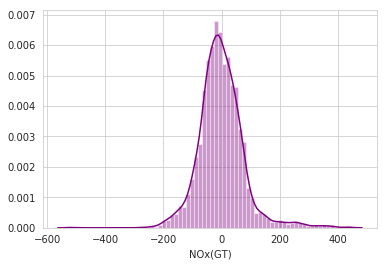

In [63]:
sns.distplot((y_test-prediction), bins=70, color="purple")

In [66]:
from sklearn import metrics

In [67]:
print('MAE:',metrics.mean_absolute_error(y_test, prediction))
print('MSE:',metrics.mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 55.99727969719653
MSE: 6106.883635896359
RMSE: 78.14655229692708


In [68]:
coeff_data

,Coefficient
CO(GT),61.091916
PT08.S1(CO),0.000391
C6H6(GT),11.911765
PT08.S2(NMHC),0.055789
PT08.S3(NOx),0.038488
NO2(GT),1.465944
PT08.S4(NO2),-0.388429
PT08.S5(O3),0.056172
RH,1.874586
AH,108.394627
